In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
df_raw = pd.read_csv('train.csv', low_memory = False)


In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

In [5]:
display_all(df_raw.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [6]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

## Initial preprocessing

In [7]:
train_cats(df_raw)

In [8]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [9]:
os.makedirs('tmp', exist_ok = True)
df_raw.to_feather('tmp/dataset-raw')

In [10]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [11]:
m = RandomForestRegressor(n_jobs = -1)
m.fit(df, y)
m.score(df, y)

/home/skessler/.local/lib/python3.8/site-packages/sklearn/ensemble/forest.py:244: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  warn("The default value of n_estimators will change from "


0.9752544626269237

In [12]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = int(0.2 * len(df))
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1168, 83), (1168,), (292, 83), (292,))

In [13]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [14]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/skessler/.local/lib/python3.8/site-packages/sklearn/ensemble/forest.py:244: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  warn("The default value of n_estimators will change from "


CPU times: user 217 ms, sys: 2.97 ms, total: 220 ms
Wall time: 60.2 ms
[0.06523071209085148, 0.15230678127284974, 0.973579657129644, 0.8483453383516887]


In [15]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([12.04355, 12.38839, 11.89478, 12.31717, 12.15478, 11.8494 , 12.38839, 12.28535, 11.94194, 12.10071]),
 12.13644688562189,
 12.367340793126296)

In [16]:
preds.shape

(10, 292)

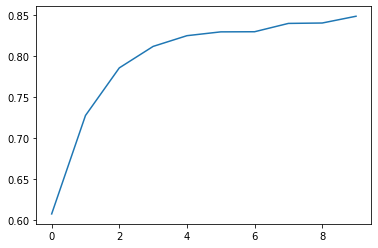

In [17]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)])

In [18]:
set_rf_samples(1000)

In [19]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 196 ms, sys: 0 ns, total: 196 ms
Wall time: 57 ms
[0.07627734473613298, 0.16028643378270246, 0.96387354532862, 0.83203808528748]


In [20]:
reset_rf_samples()

In [21]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.4, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08103554840159372, 0.14793027525691813, 0.9592258082111119, 0.8569356537109344, 0.8681827621635141]


In [22]:
fi = rf_feat_importance(m, df)
fi[:10]

,cols,imp
17,OverallQual,0.281736
46,GrLivArea,0.176513
19,YearBuilt,0.074469
27,ExterQual,0.057710
61,GarageCars,0.054577
38,TotalBsmtSF,0.046784
43,1stFlrSF,0.035232
62,GarageArea,0.033571
59,GarageYrBlt,0.022593
34,BsmtFinSF1,0.021495


/home/skessler/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='cols'>

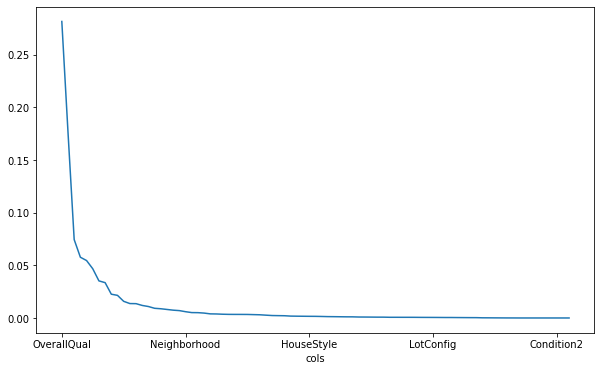

In [23]:
fi.plot('cols', 'imp', figsize = (10, 6), legend = False)

In [24]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

23

In [25]:
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [26]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.4,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08356941588638585, 0.14622325453795829, 0.9566360391526512, 0.8602183457403654, 0.8696417789809422]


<AxesSubplot:ylabel='cols'>

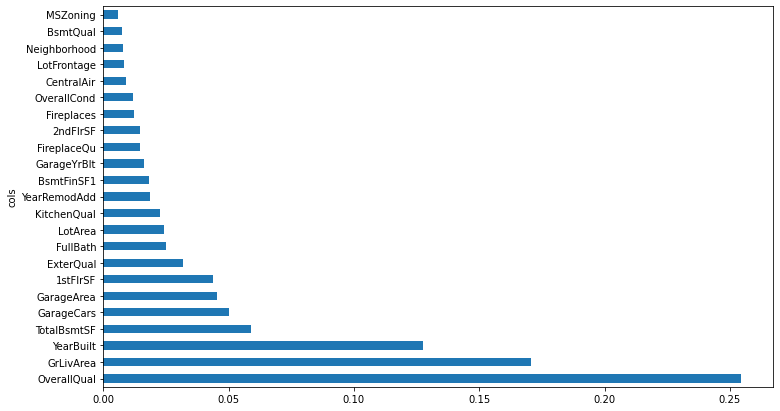

In [27]:
fi = rf_feat_importance(m, df_keep)

def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi)

In [28]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat = 7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.4, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0803524686964249, 0.14696373116692235, 0.9599103136106106, 0.8587990485980757, 0.867928274815192]


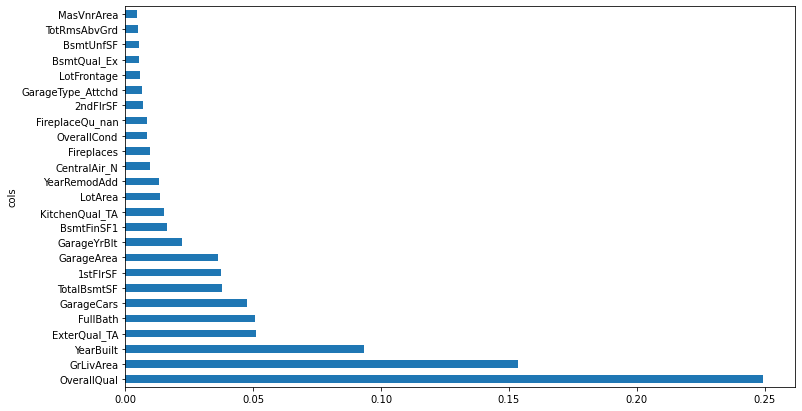

In [29]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

## Removing redundant features

In [30]:
from scipy.cluster import hierarchy as hc

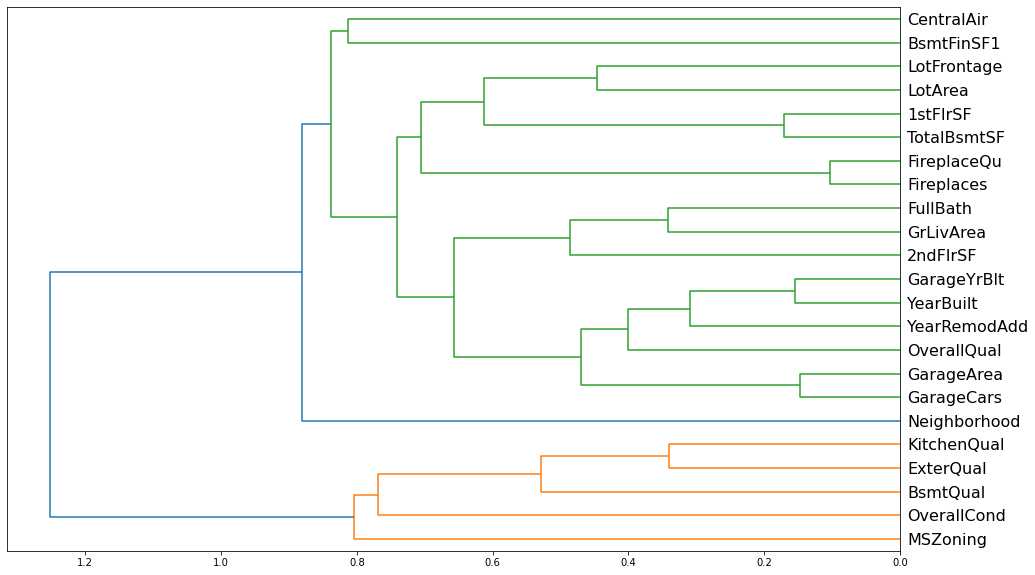

In [31]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

ok...nothing redundant it seems...

In [32]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

## Partial Dependance

In [39]:
from pdpbox import pdp
from plotnine import *

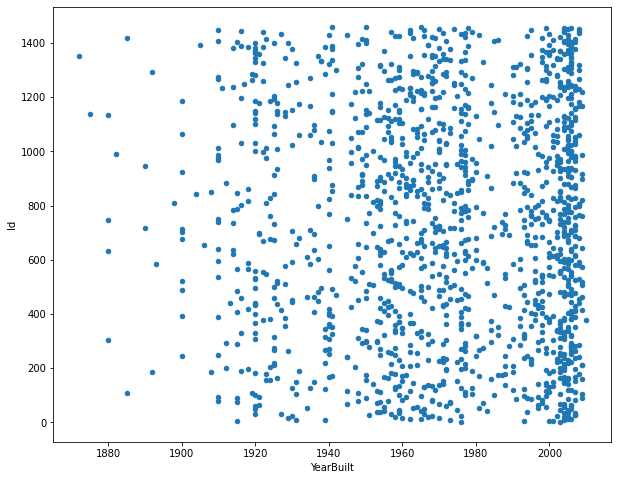

In [40]:
df_raw.plot('YearBuilt', 'Id', 'scatter', alpha = 1, figsize = (10,8));

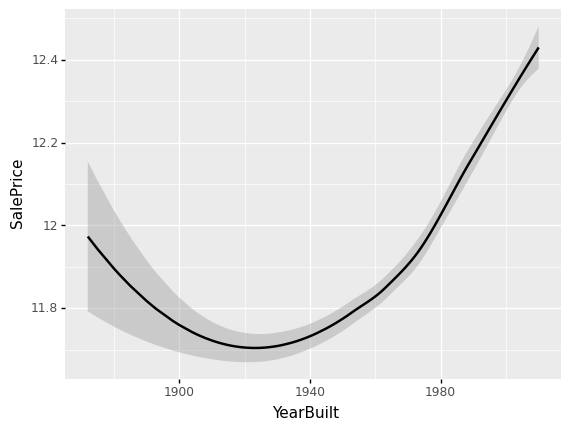

<ggplot: (8734502141130)>

In [43]:
ggplot(df_raw, aes('YearBuilt', 'SalePrice'))+stat_smooth(se = True, method = 'loess')

In [48]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(model=m, dataset=X_train, model_features=X_train.columns, feature=feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='YearBuilt'>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


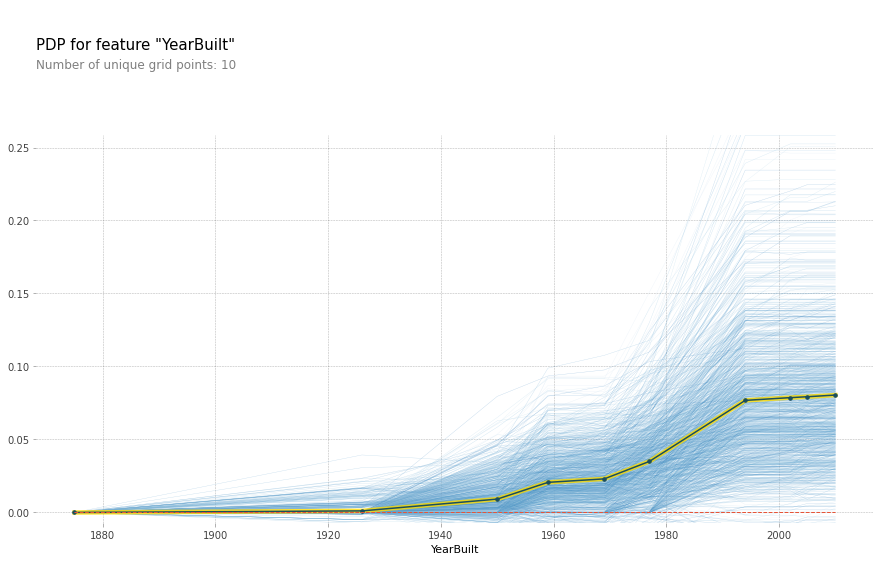

In [49]:
plot_pdp('YearBuilt')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='YearBuilt'>})

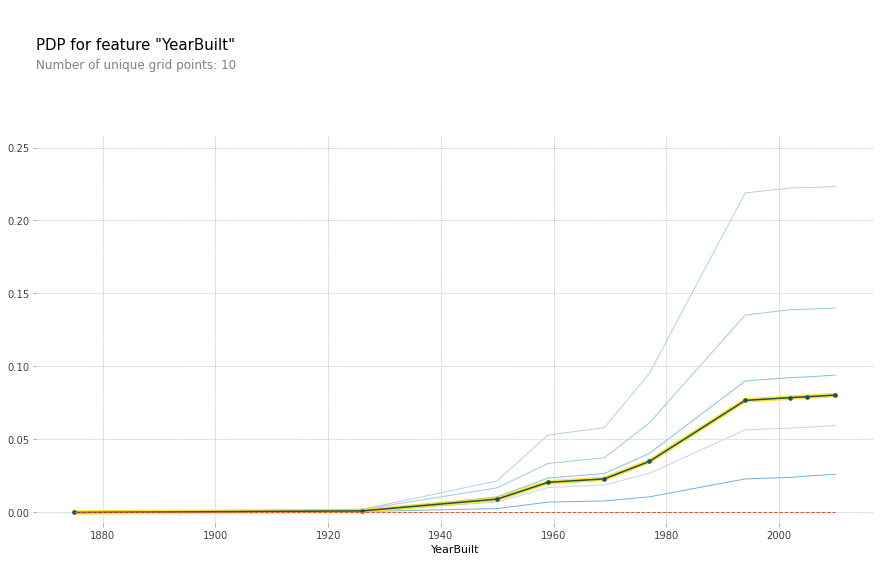

In [51]:
plot_pdp('YearBuilt', clusters = 5)

In [53]:
df_keep['age'] = df_raw['age'] = df_raw.YrSold-df_raw.YearBuilt

<AxesSubplot:ylabel='cols'>

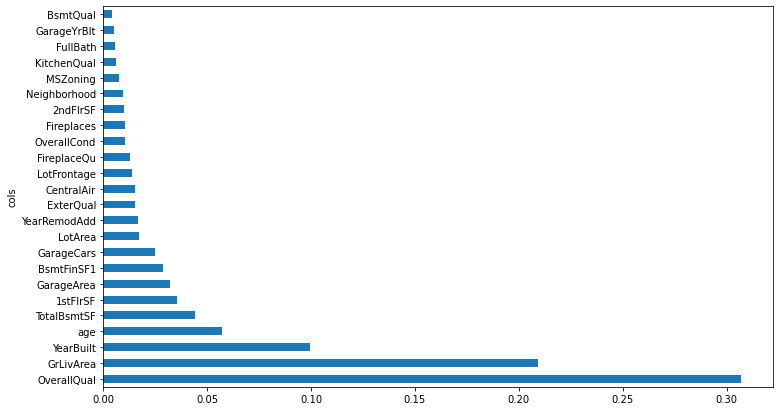

In [54]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators = 40, min_samples_leaf = 3, max_features = 0.6, n_jobs = -1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep))

In [55]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

In [56]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.7808219178082192

In [57]:
fi = rf_feat_importance(m, x)
fi[:10]

,cols,imp
12,LotArea,0.113264
7,GarageArea,0.101185
5,TotalBsmtSF,0.079185
1,GrLivArea,0.078442
9,BsmtFinSF1,0.077616
6,1stFlrSF,0.075717
18,LotFrontage,0.067528
23,age,0.063325
8,GarageYrBlt,0.050423
11,YearRemodAdd,0.049306


In [58]:
feats = ['LotArea', 'GarageArea']

In [59]:
(X_train[feats]/1000).describe()

,LotArea,GarageArea
count,1168.000000,1168.000000
mean,10.521577,0.472156
std,10.678605,0.210835
min,1.300000,0.000000
25%,7.555000,0.334500
50%,9.423000,0.478000
75%,11.608500,0.576000
max,215.245000,1.390000


In [60]:
(X_valid[feats]/1000).describe()

,LotArea,GarageArea
count,292.000000,292.000000
mean,10.497832,0.476277
std,6.495476,0.225638
min,1.533000,0.000000
25%,7.543500,0.332500
50%,9.600000,0.482000
75%,11.540500,0.576000
max,63.887000,1.418000
